## Importing Python Libraries Dependencies

In [22]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

## Importing the datasets containing male and female names

In [3]:
dataM = pd.read_csv('Male-Names.csv')
dataF = pd.read_csv('Female-Names.csv')

## Joining the two datasets

In [4]:
df = pd.concat([dataM , dataF])

## Resultant dataset

In [5]:
df.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


## Cleaning the dataset
## (Any word having length more than 19 or having a character not included in the character set is excluded)

In [6]:
def should_keep(word):
    if(len(word) > 19):
        return False
    char_set  = [' ', '.', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8', 'END', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z']
    for ch in word: 
        if ch not in set(char_set):
            return False
    return True
   
def clean(word):
    name = str(word)
    name = name.lower()
    if should_keep(name):
        return name
    else:
        return None
df.name = df.name.apply(lambda word : clean(word) )    
     

## Dataset after removing the null values and dropping the race column

In [7]:
df = df.dropna()
df = df.drop('race' , axis = 1)
df.head()

,name,gender
0,barjraj,m
1,ramdin verma,m
2,sharat chandran,m
3,birender mandal,m
4,amit,m


## Processing the data

In [8]:
char_set  = [' ', '.', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8', 'END', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z']
char2idx = {}
index = 0

for ch in char_set:
    char2idx[ch] = index
    index+=1
    
vector_len = 39
max_word_len = 20
words = []
labels = []

for name, gender in df.itertuples(index = False):
    one_hots_word = []
    
    for ch in name:
        vec = np.zeros(vector_len)
        vec[char2idx[ch]] = 1
        one_hots_word.append(vec)
    
    for _ in range(max_word_len - len(name)):
        vec = np.zeros(vector_len)
        vec[char2idx['END']] = 1
        one_hots_word.append(vec)
        
    one_hots_word = np.array(one_hots_word)
    words.append(one_hots_word)
    labels.append(gender)
    

## Converting the word list into numpy array and checking its shape

In [9]:
words = np.array(words)
words.shape

(28000, 20, 39)

## Label list

In [14]:
labels[:10]


array(['m', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm'], dtype='<U1')

## One Hot Encoding the Labels List

In [15]:
labels = np.array(labels)
ohe  = OneHotEncoder()

labels_one_hot = ohe.fit_transform(labels.reshape(-1 , 1)).todense()
labels_one_hot[:10]

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])

## Creating a Sequential model having LSTM,Dropout and Dense layers

In [16]:
model = Sequential()
model.add(LSTM(128 , input_shape = (20 , 39) , return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(.3))
model.add(Dense(2 , activation='sigmoid'))
model.summary()


W0409 16:49:57.887683 11236 deprecation_wrapper.py:119] From C:\Users\l\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0409 16:49:58.603901 11236 deprecation_wrapper.py:119] From C:\Users\l\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0409 16:49:58.953840 11236 deprecation_wrapper.py:119] From C:\Users\l\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0409 16:50:01.986318 11236 deprecation_wrapper.py:119] From C:\Users\l\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0409 16:50:02.035289 11236 deprecation.py:506] From C:\Users\

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 128)           86016     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 217,858
Trainable params: 217,858
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [17]:
model.compile(optimizer='rmsprop' , loss = 'categorical_crossentropy' , metrics = ['acc'] )


W0409 16:50:12.035094 11236 deprecation_wrapper.py:119] From C:\Users\l\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0409 16:50:12.160015 11236 deprecation_wrapper.py:119] From C:\Users\l\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Train_test_spliting the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(words,labels_one_hot , test_size=0.33, random_state=42)


## Fitting the data into the model

In [19]:
hist=model.fit(X_train , y_train , epochs=10 )


W0409 16:50:24.683340 11236 deprecation.py:323] From C:\Users\l\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
18760/18760 [==============================] - 118s 6ms/step - loss: 0.5167 - acc: 0.7434
Epoch 2/10
18760/18760 [==============================] - 95s 5ms/step - loss: 0.3829 - acc: 0.8373: 2s - loss: 0.384
Epoch 3/10
18760/18760 [==============================] - 97s 5ms/step - loss: 0.3295 - acc: 0.8689
Epoch 4/10
18760/18760 [==============================] - 103s 6ms/step - loss: 0.2895 - acc: 0.8900
Epoch 5/10
18760/18760 [==============================] - 106s 6ms/step - loss: 0.2631 - acc: 0.9036 9s  - ETA: 4s - los
Epoch 6/10
18760/18760 [==============================] - 76s 4ms/step - loss: 0.2467 - acc: 0.9120
Epoch 7/10
18760/18760 [==============================] - 41s 2ms/step - loss: 0.2301 - acc: 0.9195
Epoch 8/10
18760/18760 [==============================] - 39s 2ms/step - loss: 0.2150 - acc: 0.9254
Epoch 9/10
18760/18760 [==============================] - 37s 2ms/step - loss: 0.2050 - acc: 0.9289
Epoch 10/10
18760/18760 [==============================] - 

## Evaluating the model

In [20]:
model.evaluate(X_test,y_test)


9240/9240 [==============================] - 4s 383us/step


[0.1922676178413036, 0.9329004329004329]

## Plotting the accuracy of the model against epochs 

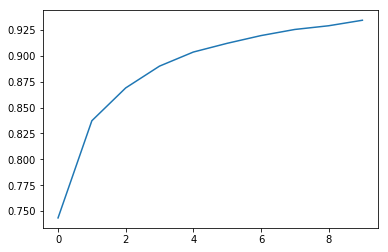

In [23]:
plt.plot(hist.history["acc"])

## Plotting the loss of the model against epochs

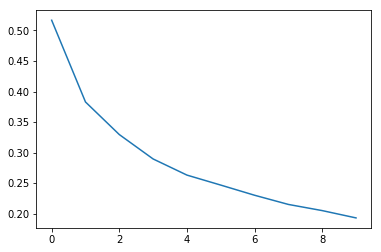

In [24]:
plt.plot(hist.history["loss"])

## Predicting the data

In [42]:
X_pred=model.predict(X_test[0].reshape(1,20,39))

In [43]:
np.argmax(X_pred)

0

In [45]:
np.argmax(y_test[0])

0